In [110]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df = pd.read_excel("preprocessed.xlsx", index_col=0)
df.head(10)

,Age,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,1,2,1,1,1,7,4,51552,C++;Python;Git;PostgreSQL,4,0
1,1,1,1,1,1,1,12,5,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,1,2,1,1,1,15,6,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,1,1,1,1,1,9,6,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,2,1,5,0,1,2,40,30,160932,C++;Python,2,0
5,1,1,2,1,1,1,9,2,38915,JavaScript;Python;Docker;Git;MySQL,5,0
6,2,1,2,1,1,1,26,18,77831,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,1,1,2,1,1,2,14,5,81319,C++;Python;Docker;Git,4,0
8,2,1,1,1,1,1,39,21,68507,Python;Git;PostgreSQL,3,0
9,2,1,2,1,1,1,20,16,37752,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [126]:
col_to_drop = ["Employment", "MainBranch", "HaveWorkedWith"]
df.drop(columns=col_to_drop, axis=1, inplace=True)
df.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,1,1,2,1,7,4,51552,4,0
1,1,1,1,1,12,5,46482,12,1
2,1,1,2,1,15,6,77290,7,0
3,1,1,1,1,9,6,46135,13,0
4,2,1,5,1,40,30,160932,2,0
5,1,1,2,1,9,2,38915,5,0
6,2,1,2,1,26,18,77831,17,1
7,1,1,2,1,14,5,81319,4,0
8,2,1,1,1,39,21,68507,3,0
9,2,1,2,1,20,16,37752,6,0


In [127]:
df_x = pd.DataFrame([df.Age, df.Accessibility, df.EdLevel, df.MentalHealth, df.YearsCode, df.YearsCodePro, df.PreviousSalary, df.ComputerSkills]).transpose()
df_x.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,1,1,2,1,7,4,51552,4
1,1,1,1,1,12,5,46482,12
2,1,1,2,1,15,6,77290,7
3,1,1,1,1,9,6,46135,13
4,2,1,5,1,40,30,160932,2
5,1,1,2,1,9,2,38915,5
6,2,1,2,1,26,18,77831,17
7,1,1,2,1,14,5,81319,4
8,2,1,1,1,39,21,68507,3
9,2,1,2,1,20,16,37752,6


In [128]:
df_y = pd.DataFrame([df.Employed]).transpose()
df_y.head(10)

,Employed
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [129]:
columns_to_float = ["Age", "Accessibility", "EdLevel", "MentalHealth", "YearsCode", "YearsCodePro", "PreviousSalary", "ComputerSkills"]

for col in columns_to_float:
    df_x[col] = df_x[col].astype("float32")

df_x.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,1.0,1.0,2.0,1.0,7.0,4.0,51552.0,4.0
1,1.0,1.0,1.0,1.0,12.0,5.0,46482.0,12.0
2,1.0,1.0,2.0,1.0,15.0,6.0,77290.0,7.0
3,1.0,1.0,1.0,1.0,9.0,6.0,46135.0,13.0
4,2.0,1.0,5.0,1.0,40.0,30.0,160932.0,2.0
5,1.0,1.0,2.0,1.0,9.0,2.0,38915.0,5.0
6,2.0,1.0,2.0,1.0,26.0,18.0,77831.0,17.0
7,1.0,1.0,2.0,1.0,14.0,5.0,81319.0,4.0
8,2.0,1.0,1.0,1.0,39.0,21.0,68507.0,3.0
9,2.0,1.0,2.0,1.0,20.0,16.0,37752.0,6.0


In [130]:
df_y["Employed"] = df_y.Employed.astype("float32")
df_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [119]:
from sklearn.preprocessing import StandardScaler
import numpy as np

norm_scaler = StandardScaler()

years_code = df_x["YearsCode"].values.reshape(-1, 1)
years_code_pro = df_x["YearsCodePro"].values.reshape(-1, 1)
comp_skill = df_x["ComputerSkills"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_code, years_code_pro, comp_skill))

new_values = norm_scaler.fit_transform(data_to_normal)

df_x["YearsCode"] = new_values[:, 0]
df_x["YearsCodePro"] = new_values[:, 1]
df_x["ComputerSkills"] = new_values[:, 2]

df_x.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,1.0,1.0,2.0,1.0,-0.767551,-0.640488,51552.0,-1.335861
1,1.0,1.0,1.0,1.0,-0.235925,-0.514862,46482.0,-0.202361
2,1.0,1.0,2.0,1.0,0.083050,-0.389236,77290.0,-0.910798
3,1.0,1.0,1.0,1.0,-0.554901,-0.389236,46135.0,-0.060674
4,2.0,1.0,5.0,1.0,2.741180,2.625783,160932.0,-1.619236
5,1.0,1.0,2.0,1.0,-0.554901,-0.891739,38915.0,-1.194173
6,2.0,1.0,2.0,1.0,1.252627,1.118274,77831.0,0.506076
7,1.0,1.0,2.0,1.0,-0.023275,-0.514862,81319.0,-1.335861
8,2.0,1.0,1.0,1.0,2.634855,1.495151,68507.0,-1.477548
9,2.0,1.0,2.0,1.0,0.614676,0.867022,37752.0,-1.052486


In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

years_code = df_x["YearsCode"].values.reshape(-1, 1)
years_code_pro = df_x["YearsCodePro"].values.reshape(-1, 1)
comp_skill = df_x["ComputerSkills"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_code, years_code_pro, comp_skill))

new_values = scaler.fit_transform(data_to_normal)

df_x["YearsCode"] = new_values[:, 0]
df_x["YearsCodePro"] = new_values[:, 1]
df_x["ComputerSkills"] = new_values[:, 2]

df_x.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,1.0,1.0,2.0,1.0,0.14,0.08,51552.0,0.037383
1,1.0,1.0,1.0,1.0,0.24,0.10,46482.0,0.112150
2,1.0,1.0,2.0,1.0,0.30,0.12,77290.0,0.065421
3,1.0,1.0,1.0,1.0,0.18,0.12,46135.0,0.121495
4,2.0,1.0,5.0,1.0,0.80,0.60,160932.0,0.018692
5,1.0,1.0,2.0,1.0,0.18,0.04,38915.0,0.046729
6,2.0,1.0,2.0,1.0,0.52,0.36,77831.0,0.158879
7,1.0,1.0,2.0,1.0,0.28,0.10,81319.0,0.037383
8,2.0,1.0,1.0,1.0,0.78,0.42,68507.0,0.028037
9,2.0,1.0,2.0,1.0,0.40,0.32,37752.0,0.056075


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_x, df_y, test_size=0.1, random_state=1)


print(f"Data before splitting: {len(df_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 66115
Validation data: 7347


In [132]:
len_feature = len(df_x.columns)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
2067/2067 [==============================] - 22s 10ms/step - loss: 47.7879 - accuracy: 0.5129 - val_loss: 69.3795 - val_accuracy: 0.5368
Epoch 2/20
2067/2067 [==============================] - 21s 10ms/step - loss: 16.1761 - accuracy: 0.5368 - val_loss: 2.7664 - val_accuracy: 0.5719
Epoch 3/20
2067/2067 [==============================] - 21s 10ms/step - loss: 4.6347 - accuracy: 0.5738 - val_loss: 2.3019 - val_accuracy: 0.5627
Epoch 4/20
2067/2067 [==============================] - 21s 10ms/step - loss: 2.1560 - accuracy: 0.5941 - val_loss: 0.6980 - val_accuracy: 0.5512
Epoch 5/20
2067/2067 [==============================] - 21s 10ms/step - loss: 0.7179 - accuracy: 0.5592 - val_loss: 0.6884 - val_accuracy: 0.5376
Epoch 6/20
2067/2067 [==============================] - 20s 10ms/step - loss: 0.6900 - accuracy: 0.5381 - val_loss: 0.6879 - val_accuracy: 0.5383
Epoch 7/20
2067/2067 [==============================] - 21s 10ms/step - loss: 0.6888 - accuracy: 0.5373 - val_loss: 0.687

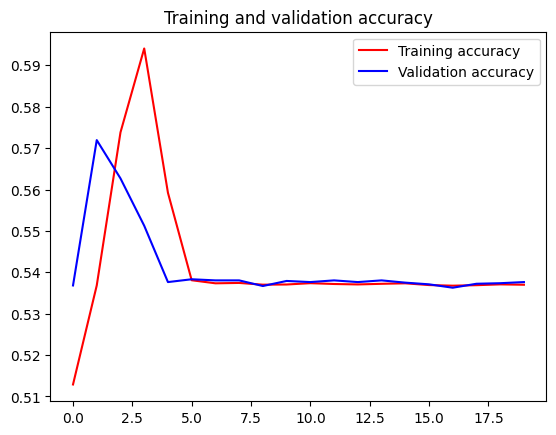

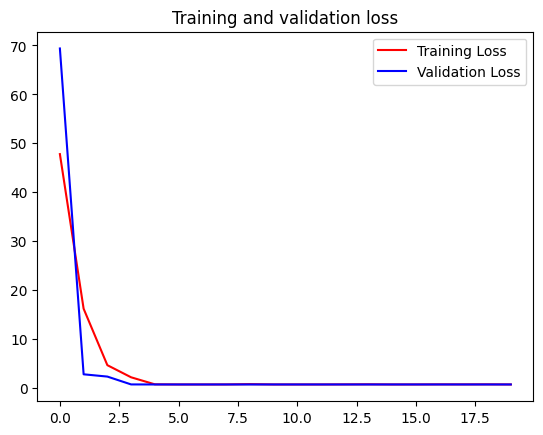

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()